In [1]:
import torch
import numpy as np
from PIL import Image
import torch.nn.functional as F
import imageio
import matplotlib.pyplot as plt
import dataset.dataset


In [92]:
num_points = 2048
sample_input = np.array(Image.open('/media/alex/SSD Datastorage/guided-research/data/processed/overfit/00000/cat2_scaled.jpg'), dtype=np.float32).transpose(2,0,1)
sample_input = torch.from_numpy(sample_input)
print(sample_input.shape)
points = torch.rand(size=(num_points,2))*224
#points = points.repeat(3,1,1)
print(points.shape)
points_idx = points.type(torch.LongTensor)
#sample_target = sample_input[points_idx[:,:,0], points_idx[:,:,1]]

torch.Size([3, 224, 224])
torch.Size([2048, 2])


In [96]:
print(points_idx[:5,:5])
print(sample_input[:,20,216])
print(sample_input[:,171,57])
print(sample_input[:,points_idx[:,0],points_idx[:,1]].shape)
# sample_input[channel, x, y]
print(sample_input.min())

tensor([[ 20, 216],
        [ 17, 150],
        [172, 189],
        [100, 199],
        [171,  57]])
tensor([107.,  83.,  59.])
tensor([235., 209., 184.])
torch.Size([3, 2048])
tensor(0.)


In [ ]:
def pixel_val_of_index(image, idx):
    

In [48]:
greyimg = sample_input.unsqueeze(0)
sample_pts = points.unsqueeze(0).unsqueeze(0)
print(greyimg.shape, sample_pts.shape)

torch.Size([1, 3, 224, 224]) torch.Size([1, 1, 2048, 2])


In [36]:
test = F.grid_sample(greyimg, sample_pts, align_corners=True)

In [37]:
test.shape

torch.Size([1, 1075, 1, 2048])

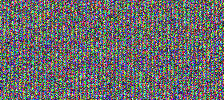

In [134]:
#need HxWx3 image
my_img = torch.rand(size=(100,224,3))*255
img = Image.fromarray(my_img.numpy(), 'RGB')
img

In [132]:
shape = torch.tensor([224,224])
print(shape.shape)
def network(pi):
    return (torch.rand(size=(1,1,1))*255).repeat((pi,1))

def make_grid(bb_min, bb_max, shape):
    size = shape[0] * shape[1] 
    pxs = torch.linspace(bb_min[0], bb_max[0], shape[0])
    pys = torch.linspace(bb_min[1], bb_max[1], shape[1])

    pxs = pxs.view(-1, 1).expand(*shape).contiguous().view(size)
    pys = pys.view(1, -1).expand(*shape).contiguous().view(size)
    p = torch.stack([pxs, pys], dim=1)
    return p

def evaluate_network():
    pointsf = make_grid(
        (-1,)*2, (1,)*2, shape
    )
    p_split = torch.split(pointsf, 50176)
    values = []
    for pi in p_split:
        occ_hat = network(pi)
        values.append(occ_hat.squeeze(0))
    value = torch.cat(values, dim=0).numpy()
    value_grid = value.reshape(shape[0], shape[1])
    return value_grid
    

torch.Size([2])


In [133]:
a = make_grid((-1,-1), (1,1), shape)
print(a.shape)
print(a)
evaluate_network()

torch.Size([50176, 2])
tensor([[-1.0000, -1.0000],
        [-1.0000, -0.9910],
        [-1.0000, -0.9821],
        ...,
        [ 1.0000,  0.9821],
        [ 1.0000,  0.9910],
        [ 1.0000,  1.0000]])


TypeError: repeat(): argument 'repeats' must be tuple of ints, but found element of type Tensor at pos 1

In [136]:
cba = torch.rand(3,224,224)*255

In [145]:
torch
B_gauss = random.normal()

NameError: name 'random' is not defined

In [148]:
target = torch.rand(3,224,224)

# Create input pixel coordinates in the unit square. This will be the input to the model.
coords = np.linspace(0, 1, target.shape[2], endpoint=False)
xy_grid = np.stack(np.meshgrid(coords, coords), -1)
xy_grid = torch.tensor(xy_grid).unsqueeze(0).permute(0, 3, 1, 2).float().contiguous()

In [150]:
xy_grid.shape

torch.Size([1, 2, 224, 224])

In [3]:
def tensor_to_numpy(tensor: torch.Tensor) -> np.ndarray:
    tensor = tensor * 256
    tensor[tensor > 255] = 255
    tensor[tensor < 0] = 0
    tensor = tensor.type(torch.uint8).permute(1, 2, 0).cpu().numpy()
    return tensor

def get_image(path):
    img = imageio.imread(path)[..., :3] / 255.
    #c = [img.shape[0] // 2, img.shape[1] // 2]
    #r = 256
    #img = img[c[0] - r:c[0] + r, c[1] - r:c[1] + r]

    return img



In [2]:
path = '/media/alex/SSD Datastorage/guided-research/data/processed/overfit/00000/cat2_scaled.jpg'

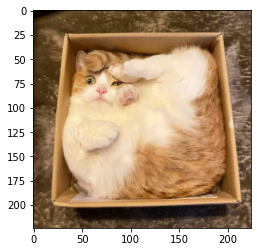

torch.Size([2, 224, 224])

In [169]:
#get_image(path).shape

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get an image that will be the target for our model.
target = torch.tensor(get_image(path)).unsqueeze(0).permute(0, 3, 1, 2).to(device)
plt.imshow(tensor_to_numpy(target[0]))
plt.show()

# Create input pixel coordinates in the unit square. This will be the input to the model.
coords = np.linspace(0, 1, target.shape[2], endpoint=False)
xy_grid = np.stack(np.meshgrid(coords, coords), -1)
xy_grid = torch.tensor(xy_grid).permute(2, 0, 1).float().contiguous().to(device)
xy_grid.shape

In [171]:
target.shape

torch.Size([1, 3, 224, 224])

In [9]:
a = torch.tensor(dataset.dataset.get_image(path)).permute(2, 0, 1)
#plt.imshow(a)
#dataset.dataset.pixels_to_points(a).shape # 2,224,224